# 第3回 NumpyとPandas（金融時系列データ）

[Numpy](https://numpy.org/)は主にベクトル・行列の計算のためのライブラリ、[Pandas](https://pandas.pydata.org/)はデータ処理のためのライブラリ（Excelのような役割）。

## ライブラリ、パッケージ、モジュール
モジュールとはよく使われるプログラムをまとめたものである。いくつかのモジュールを集めたものをパッケージ、いくつかのパッケージを集めたものをライブラリと呼ぶ。
```
ライブラリ　> パッケージ > モジュール
```
実際にはこの3つの区分は曖昧に使われる（ライブラリをモジュールと呼んだりする）。

ライブラリには標準ライブラリと外部ライブラリがある。標準ライブラリはPythonをインストールすれば使えるようになる。例えばmathライブラリは標準ライブラリの一つである。一方でNumpyやPandasは外部ライブラリで、使用するにはインストールが必要になる。Google ColabにはNumpyやPandasなどよく使われるデータサイエンス向けのライブラリはインストールされている。Google Colabにインストールされていないライブラリを自分でインストールすることもできる。

Pythonのプログラムの中でライブラリを使えるようにするには `import`を行う。
```
import ライブラリ名
```
ライブラリを別名で呼び出すこともできる。
```
import ライブラリ名 as 別名
```

ライブラリに含まれるあるモジュールだけインポートしたい場合は
```
from ライブラリ名 import モジュール名
```
とする。モジュールに含まれる関数は
```
モジュール名.関数名
```
として使う。

もしくはモジュールに含まれる特定の関数だけインポートすることもできる。
```
from モジュール名 import 関数名
```
とする。

以下の2つのプログラムは同じ計算をしている。


In [ ]:
import math
print(math.sqrt(2))

1.4142135623730951


In [ ]:
from math import sqrt
print(sqrt(2))

1.4142135623730951


いろいろなモジュールのインポートの仕方があるため、同じことをしていても文献によってプログラムが違うように見えるので注意する。

## オブジェクト

値や関数（メソッド）を内包したものを**オブジェクト**と呼ぶ。Pythonではあらゆる値・変数・関数などはオブジェクトである。オブジェクトは型を持ち、型に応じてさまざまなメソッドが定義されている。オブジェクトに含まれるメソッドは

```
オブジェクト.メソッド名()
```
として使う。

例えばリスト型には`append()`というメソッドがあり、このメソッドを使うとリストの末尾に要素を追加することができる。


In [ ]:
mylist = [10, 20, 30, 40]
print(type(mylist))

<class 'list'>


In [ ]:
mylist.append(50)
print(mylist)


[10, 20, 30, 40, 50]


## Numpy

リストでもベクトルや行列を作ることはできるが、NumpyライブラリのNumpy配列（ndarray）にNumpyライブラリに含まれる数値計算メソッドを適用することで、より高速な数値計算ができ、プログラミングも効率的にできる。

例えば、リストによりつぎのようなベクトル`a`と行列`A`を定義することはできる。

In [ ]:
a = [1, 2, 3, 4]
A= [[1, 2, 3, 4], [5, 6, 7, 8]]

print(2 * a)
print(A[0, 1])

[1, 2, 3, 4, 1, 2, 3, 4]


TypeError: ignored

`print(2 * a)`の結果は`[2, 4, 6, 8]`となって欲しい。`A[0, 1]`は`2`であって欲しい（`A[0][1]`と書けばよいのだが）。

Numpyを使うと、つぎのようになる。`import numpy as np`として`np`という名前でNumpyライブラリをインポートしている。

In [ ]:
import numpy as np
b = np.array(a)
B = np.array(A)

`b`や`B`の型はndarrayであり、Numpy配列と呼ぶことが多い。

In [ ]:
print(type(b))
print(type(B))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(b)

[1 2 3 4]


Numpy配列に対しては要素ごとの計算ができる。

In [ ]:
print(2 * b)
print(B[0, 1])

[2 4 6 8]
2


Numpyにはいろいろな数学・統計関数が用意されている。授業では必要に応じて紹介する。例えば、各要素の指数関数を計算する`np.exp`や要素の平均を計算する`np.mean`などがある。

In [ ]:
print(np.exp(b))

[ 2.71828183  7.3890561  20.08553692 54.59815003]


In [ ]:
print(np.mean(B)) # 全要素の平均
print(np.mean(B, axis=0)) # 列ごとの平均
print(np.mean(B, axis=1)) # 行ごとの平均

4.5
[3. 4. 5. 6.]
[2.5 6.5]


つぎのような計算も役に立つ。何を計算しているか？

In [ ]:
np.sum(b > 2)

2

### モンテカルロ法（ベクトル化）によるオプション価格付け

Black-Scholesモデルの仮定の下では、$T$時点における株価$S(T)$は（リスク中立確率の下で）

$$
S(T) = S_0 \exp\left\{\left(r - \frac{\sigma^2}{2}\right)T + \sigma \sqrt{T} z\right\} \tag{1}
$$

に従う。ここで、$S_0$は時点0（現時点）の株価、$\sigma$はボラティリティ、$r$は無リスク金利、$z$は標準正規分布にしたがう確率変数。

このとき、権利行使価格$K$のヨーロピアンコールオプションの価格は

$$
e^{-rT}E[(S(T) - K)^+]  \tag{2} 
$$

により計算できる。ここで、$(x)^+ = \max\{x, 0\}$である。
（2）をモンテカルロ法により計算する。ただし、**for文は使わない**。

In [ ]:
#import numpy as np

N = 100000 #生成する標本の数

S = 100
K = 99
T = 1
r = 0.01
sigma = 0.2

np.random.seed(1)
rnd = np.random.standard_normal(N)
price = S * np.exp((r - 0.5 * sigma ** 2)* T + sigma * np.sqrt(T) * rnd)
payoff = np.maximum(price - K, 0)
value = np.exp(-r * T) * np.mean(payoff)

print(f'{value:.3f}')

8.962


**練習問題（デジタルオプションの価格付け）** $T$時点における株価$S(T)$が（リスク中立確率のもとで）(1) に従うとする。このとき 

$$
I\{S(T) > K\}
$$

という支払いを持つオプションの価格

$$
e^{-rT}E[I\{S(T) > K\}]
$$

をモンテカルロ法により計算せよ。ここで $I\{\}$は$\{ \}$内の条件が満たされたとき$1$、そうでないとき$0$の値を取る関数である。すなわち、

$$
Tにおける支払い = 
\begin{cases}
1,\ \text{if}\ S(T) > K\\
0,\ \text{if}\ S(T) \leq K
\end{cases}
$$

である。

In [ ]:
N = 100000 #生成する標本の数

S = 100
K = 99
T = 1
r = 0.01
sigma = 0.2

np.random.seed(1)
rnd = np.random.standard_normal(N)
price = S * np.exp((r - 0.5 * sigma ** 2)* T + sigma * np.sqrt(T) * rnd)
payoff = price > K
value = np.exp(-r * T) * np.mean(payoff)

print(f'{value:.3f}')

0.498


## Pandas
Pandasは表形式データを処理・分析するためのライブラリ。csvファイルの読み込み、書き出しにも対応している。Pandasで使われるデータ型はDataFrameとSeriesである。
Seriesは列数が1のデータ、DataFrameはSeriesが2つ以上集まった（列数が2以上の）データ。

DataFrame型のデータはインデックスとラベルを持ち、インデックスやラベルを使ってデータの抽出や計算ができる。

### データの読み込み
Pandasの`read_csv()`メソッドを使って外部csvファイルを読み込んでみよう。
`sample1.csv`には株価の時系列データが含まれている。Google Colabで外部データを読み込む場合にはGoogleドライブをマウントする必要がある。

まず、Pandasをインポートする。

In [ ]:
import pandas as pd

Googleドライブをマウントした後、ファイルのパスを`''`内にペーストしてから以下を実行する

In [ ]:
df = pd.read_csv('', index_col=0, parse_dates=True)

`index_col=0`は0列目がインデックスであることを示す。
`parse_dates=True`によりインデックスで指定された列をdatetime型に変換する。

`df`がDataFrame型であることを確認。

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


`head()`メソッドでデータの先頭を見る。

In [ ]:
df.head()

,T6758,T6594,T7203
date,,,
2017-03-31,3766.0,5297.5,1208.4
2017-04-30,3759.0,5110.0,1207.0
2017-05-31,4034.0,5487.5,1186.4
2017-06-30,4286.0,5755.0,1178.6
2017-07-31,4540.0,6080.0,1246.8


`shape`メソッドで列数と行数を見る。

In [ ]:
df.shape

(62, 3)

`info()`メソッドと`describe()`メソッドによりデータの基本情報が表示される。

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2017-03-31 to 2022-04-18
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T6758   62 non-null     float64
 1   T6594   62 non-null     float64
 2   T7203   62 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


In [ ]:
df.describe()

,T6758,T6594,T7203
count,62.000000,62.000000,62.000000
mean,7557.177419,8778.129032,1516.320968
std,2942.777173,2552.246609,284.959122
min,3759.000000,5110.000000,1178.600000
25%,5274.250000,6948.750000,1340.050000
50%,6516.000000,8071.250000,1406.800000
75%,10226.250000,10038.250000,1566.650000
max,14475.000000,13850.000000,2245.500000


### データの抽出

ラベル`T6758`の列を取り出す。

In [ ]:
st0 = df['T6758']

列数が1なのでSeries型

In [ ]:
type(st0)

pandas.core.series.Series

In [ ]:
print(st0)

date
2017-03-31     3766.0
2017-04-30     3759.0
2017-05-31     4034.0
2017-06-30     4286.0
2017-07-31     4540.0
               ...   
2021-12-31    14475.0
2022-01-31    12720.0
2022-02-28    11810.0
2022-03-31    12730.0
2022-04-18    11140.0
Name: T6758, Length: 62, dtype: float64


複数列を取り出すこともできる

In [ ]:
st12 = df[['T6594', 'T7203']]

In [ ]:
st12.head()

,T6594,T7203
date,,
2017-03-31,5297.5,1208.4
2017-04-30,5110.0,1207.0
2017-05-31,5487.5,1186.4
2017-06-30,5755.0,1178.6
2017-07-31,6080.0,1246.8


列数が2なのでDataFrame型

In [ ]:
print(type(st12))

<class 'pandas.core.frame.DataFrame'>


`loc`メソッドによりラベルやインデックスを指定して要素を抽出することができる。

In [ ]:
print(df.loc['2017-03-31', 'T6758'])
print(df.loc['2017-03-31', ['T6594', 'T7203']])

3766.0
T6594    5297.5
T7203    1208.4
Name: 2017-03-31 00:00:00, dtype: float64


`:`を指定すると、**すべての**行・列を抽出できる。

In [ ]:
print(df.loc['2017-03-31', :])

T6758    3766.0
T6594    5297.5
T7203    1208.4
Name: 2017-03-31 00:00:00, dtype: float64


`iloc`メソッドによりインデックス（行番号、列番号）により、要素を抽出するとができる。

In [ ]:
print(df.iloc[0, 0])



3766.0


`:`を指定すると、**すべての**行・列を抽出できる。

In [ ]:
print(df.iloc[:, 0])

date
2017-03-31     3766.0
2017-04-30     3759.0
2017-05-31     4034.0
2017-06-30     4286.0
2017-07-31     4540.0
               ...   
2021-12-31    14475.0
2022-01-31    12720.0
2022-02-28    11810.0
2022-03-31    12730.0
2022-04-18    11140.0
Name: T6758, Length: 62, dtype: float64


### 収益率の分析
`pct_change()`メソッドによりデータの変化率（収益率）を計算することができる。

In [ ]:
rtn = df.pct_change()

In [ ]:
rtn.head()

,T6758,T6594,T7203
date,,,
2017-03-31,NaN,NaN,NaN
2017-04-30,-0.001859,-0.035394,-0.001159
2017-05-31,0.073158,0.073875,-0.017067
2017-06-30,0.062469,0.048747,-0.006575
2017-07-31,0.059263,0.056473,0.057865


`shift()`メソッドを使っても収益率を計算することができる。こちらのほうが分かりやすいかもしれない。

In [ ]:
df.shift(1)

,T6758,T6594,T7203
date,,,
2017-03-31,NaN,NaN,NaN
2017-04-30,3766.0,5297.5,1208.4
2017-05-31,3759.0,5110.0,1207.0
2017-06-30,4034.0,5487.5,1186.4
2017-07-31,4286.0,5755.0,1178.6
...,...,...,...
2021-12-31,13825.0,13000.0,2001.0
2022-01-31,14475.0,13520.0,2105.5
2022-02-28,12720.0,10090.0,2245.5


In [ ]:
rtn = df/df.shift(1) - 1

In [ ]:
rtn.head()

,T6758,T6594,T7203
date,,,
2017-03-31,NaN,NaN,NaN
2017-04-30,-0.001859,-0.035394,-0.001159
2017-05-31,0.073158,0.073875,-0.017067
2017-06-30,0.062469,0.048747,-0.006575
2017-07-31,0.059263,0.056473,0.057865


1行目は`NaN`なので、削除しておく。行や列を削除するには`drop()`メソッドを使う。

In [ ]:
print(rtn.index)

DatetimeIndex(['2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
      

In [ ]:
rtn.drop(rtn.index[0], axis=0, inplace=True)

In [ ]:
rtn.head()

,T6758,T6594,T7203
date,,,
2017-04-30,-0.001859,-0.035394,-0.001159
2017-05-31,0.073158,0.073875,-0.017067
2017-06-30,0.062469,0.048747,-0.006575
2017-07-31,0.059263,0.056473,0.057865
2017-08-31,-0.044714,0.024671,-0.008181


基本統計量の計算

In [ ]:
rtn.describe()

,T6758,T6594,T7203
count,61.000000,61.000000,61.000000
mean,0.020397,0.011587,0.010864
std,0.070398,0.083775,0.052443
min,-0.143431,-0.253698,-0.087835
25%,-0.023047,-0.024427,-0.021724
50%,0.042716,0.018339,0.009950
75%,0.073158,0.056473,0.042535
max,0.178563,0.267143,0.136877


行方向に平均を取る

In [ ]:
port_rtn = rtn.mean(axis=1)
port_rtn.head()

date
2017-04-30   -0.012804
2017-05-31    0.043322
2017-06-30    0.034881
2017-07-31    0.057867
2017-08-31   -0.009408
dtype: float64

標準偏差を計算。この値は何を意味するか？

In [ ]:
print(port_rtn.std())

0.0534160682365186


## データの可視化
Pythonにおけるデータの可視化にはMatplotlibライブラリを用いることが一般的だが、
Pandasにもデータを可視化するためのメソッドが用意されている。実際には内部でMatplotlibを使っている。

`plot()`メソッドにより折れ線グラフを描くことができる。
`%matplotlib inline`を実行することにより、ノートブック内にグラフを出力することができる（Google Colabでは不要？）。

In [ ]:
%matplotlib inline

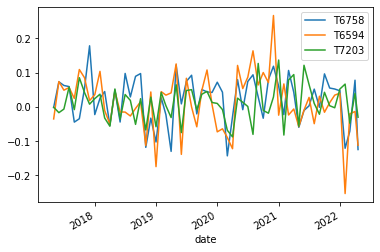

In [ ]:
rtn.plot()

`figsize`オプションによりグラフの大きさを指定できる。
`subplots`オプションを`True`とすることによりグラフを個別に出力することができる。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20edc63890>,
      dtype=object)

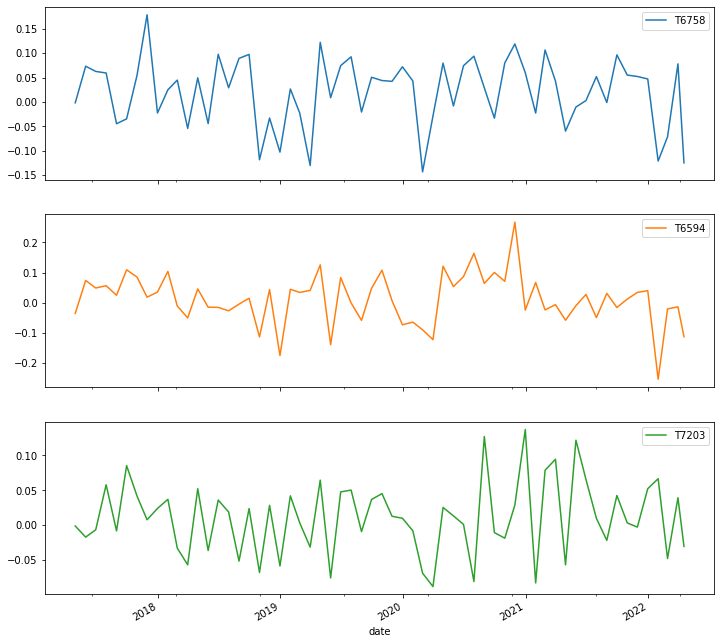

In [ ]:
rtn.plot(figsize=(12, 12), subplots=True)

ヒストグラムを描く

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20edc5fc10>,
      dtype=object)

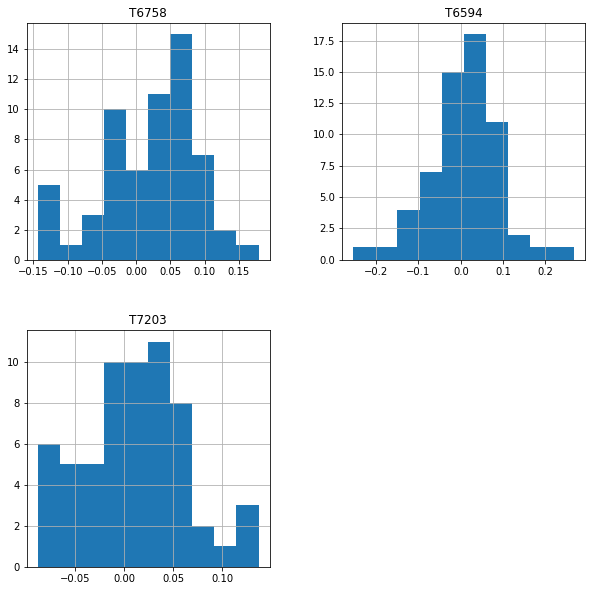

In [ ]:
rtn.hist(figsize=(10, 10))

箱ひげ図を描く。

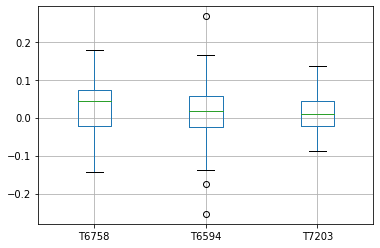

In [ ]:
rtn.boxplot()

指定できるオプション等は[マニュアル](https://pandas.pydata.org/docs/ )を参照。

Seabornライブラリを使うとより詳細なデータ可視化ができる。収益率の相関係数を可視化してみる。



In [ ]:
import seaborn as sns

In [ ]:
rtn_corr = rtn.corr()
rtn_corr

,T6758,T6594,T7203
T6758,1.000000,0.504848,0.373120
T6594,0.504848,1.000000,0.255538
T7203,0.373120,0.255538,1.000000


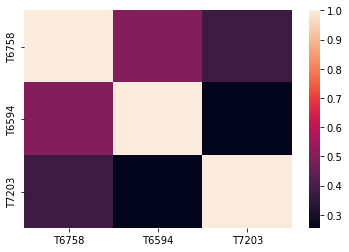

In [ ]:
sns.heatmap(rtn_corr)